# Color-magnitude diagram: narrowband filters

In this tutorial, we will compute synthetic photometry for the narrowband H2 and H3 filters of VLT/SPHERE. We will use empirical data from the [SpeX Prism Spectral Library](http://pono.ucsd.edu/~adam/browndwarfs/spexprism/index_old.html) and theoretical isochrones and spectra from the AMES-Cond and AMES-Dusty models. The synthetic colors and magnitudes are compared with the photometric data of directly imaged companions in a color-magnitude diagram.

## Getting started

We start by importing the required Python modules.

In [1]:
import numpy as np
from species import SpeciesInit
from species.data.database import Database
from species.read.read_color import ReadColorMagnitude
from species.read.read_isochrone import ReadIsochrone
from species.plot.plot_spectrum import plot_spectrum
from species.plot.plot_color import plot_color_magnitude

Next, we initiate the *species* workflow with `SpeciesInit`. This will create the configuration file with default values and the HDF5 database.

In [2]:
SpeciesInit()

species v0.8.0

Working folder: /Users/tomasstolker/applications/species/docs/tutorials

Creating species_config.ini... [DONE]
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]

Configuration settings:
   - Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
   - Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


Later on, we will interpolate the isochrone data at an age of 20 Myr for 100 logarithmically-spaced masses between 1 M<sub>Jup</sub> and 1000 M<sub>Jup</sub>.

In [3]:
age = 20.  # (Myr)
masses = np.logspace(0., 3., 100)  # (Mjup)

## Adding data and models

We will now add the required data to the database by first creating an instance of `Database`.

In [4]:
database = Database()

The [photometric data of directly imaged companions](https://github.com/tomasstolker/species/blob/master/species/data/companion_data/companion_data.json) that are available in *species* is added by using the `add_companion` method with `name=None`. Alternative, `add_object` can be used to manually add photometric and spectroscopic data of an individual object.

In [5]:
database.add_companion(name=None, verbose=False)

Add companion: ['beta Pic b', 'beta Pic c', 'HIP 65426 b', '51 Eri b', 'HR 8799 b', 'HR 8799 c', 'HR 8799 d', 'HR 8799 e', 'HD 95086 b', 'PDS 70 b', 'PDS 70 c', '2M 1207 B', 'AB Pic B', 'HD 206893 B', 'RZ Psc B', 'GQ Lup B', 'PZ Tel B', 'kappa And b', 'HD 1160 B', 'ROXs 12 B', 'ROXs 42 Bb', 'GJ 504 b', 'GJ 758 B', 'GU Psc b', '2M0103 ABb', '1RXS 1609 B', 'GSC 06214 B', 'HD 72946 B', 'HIP 64892 B', 'HD 13724 B', 'YSES 1 b', 'YSES 1 c', 'YSES 2 b', 'HD 142527 B', 'CS Cha B', 'CT Cha B', 'SR 12 C', 'DH Tau B', 'HD 4747 B', 'HR 3549 B', 'CHXR 73 B', 'HD 19467 B', 'b Cen (AB)b', 'VHS 1256 B']


100%|████████████████████████████████████████| 288k/288k [00:00<00:00, 102MB/s]

Adding spectrum: Vega


/Users/tomasstolker/applications/species/species/data/database.py:1373: UserWarning: Found 33 fluxes with NaN in the data of GPI_YJHK. Removing the spectral fluxes that contain a NaN.
  warnings.warn(


Reference: Bohlin et al. 2014, PASP, 126
URL: https://ui.adsabs.harvard.edu/abs/2014PASP..126..711B/abstract


/Users/tomasstolker/applications/species/species/data/filter_data/filter_data.py:227: UserWarning: The minimum transmission value of Subaru/CIAO.z is smaller than zero (-1.80e-03). Wavelengths with negative transmission values will be removed.
  warnings.warn(


The spectra from the SpeX Prism Spectral Library are also downloaded and added to the database. For each spectrum, the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr/simbad/) is queried for the SIMBAD identifier. The identifier is then used to extract the [distance](https://home.strw.leidenuniv.nl/~stolker/species/distance.dat) of the object (calculated from the parallax). A NaN value is stored for the distance if the object could not be identified in the SIMBAD database so these objects are not used in the color-magnitude diagram.

In [6]:
database.add_spectra('spex')

Adding spectra... LSR 2122+3656                  

/Users/tomasstolker/applications/species/species/phot/syn_phot.py:88: UserWarning: Please note that a manually provided zero-point flux is by default equalized to a magnitude of 0.03 for all filters. The magnitude of Vega can be adjusted in the configuration file (see https://species.readthedocs.io/en/latest/configuration.html) by setting the 'vega_mag' parameter. Currently the parameter is set to 0.03.
  warnings.warn(
/Users/tomasstolker/.pyenv/versions/3.11.5/envs/species3.11/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J21225635+3656002
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... SDSS J213240.36+102949.4 

/Users/tomasstolker/.pyenv/versions/3.11.5/envs/species3.11/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14044941-3159329
  warnings.warn("Warning: The script line number %i raised "
/Users/tomasstolker/.pyenv/versions/3.11.5/envs/species3.11/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J05103520-4208140
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... 2MASS J18282794+1453337     

/Users/tomasstolker/.pyenv/versions/3.11.5/envs/species3.11/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14162394+1348363
  warnings.warn("Warning: The script line number %i raised "


Adding spectra... [DONE]                  


The AMES-Cond model spectra (i.e. for cloudless atmospheres) are also downloaded and imported into the database.

In [7]:
database.add_model('ames-cond')


-------------------------
Add grid of model spectra
-------------------------

Database tag: ames-cond
Model name: AMES-Cond


100%|███████████████████████████████████████| 156M/156M [00:00<00:00, 57.9GB/s]
SHA256 hash of downloaded file: 325f3ea3ed13c51e08daacbd08811fde04762c29994bfbcc17f42223bf3432ea
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.



Unpacking 439/439 model spectra from AMES-Cond (150 MB)... [DONE]

Wavelength range (um) = 0.5 - 40
Sampling (lambda/d_lambda) = 4000
Teff range (K) = 100 - 6600

Adding AMES-Cond model spectra... ames-cond_teff_900_logg_5.5_spec.dat 

Grid points stored in the database:
   - Teff = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600.
 3700. 3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800.
 5000. 5100. 5200. 5300. 5400. 5500. 5600. 5700. 5800. 5900. 6000. 6100.
 6200. 6300. 6400. 6500. 6600.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]

Number of grid points per parameter:
   - teff: 65
   - logg: 7

Fix missing grid points with a linear interpolation:
   - teff = 200.0, logg = 5.5
   - teff = 900.0, logg = 2.5
   - teff = 4700.0, logg = 4.5
   - teff = 4700.0, logg = 5.0
   - teff = 4700.0, logg = 5.5
  

/Users/tomasstolker/applications/species/species/util/data_util.py:394: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


And also the AMES-Dusty model spectra (i.e. for dusty atmospheres) are downloaded and imported into the database.

In [8]:
database.add_model('ames-dusty')


-------------------------
Add grid of model spectra
-------------------------

Database tag: ames-dusty
Model name: AMES-Dusty


100%|█████████████████████████████████████| 60.4M/60.4M [00:00<00:00, 40.2GB/s]
SHA256 hash of downloaded file: c389dd52b35bcba2d9850921c97eee043c2ff0654cc24efc47baa2345c05254e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.



Unpacking 195/195 model spectra from AMES-Dusty (58 MB)... [DONE]

Wavelength range (um) = 0.5 - 40
Sampling (lambda/d_lambda) = 4000
Teff range (K) = 500 - 4000

Adding AMES-Dusty model spectra... ames-dusty_teff_900_logg_5.5_spec.dat 

Grid points stored in the database:
   - Teff = [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800.
 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5 6. ]

Number of grid points per parameter:
   - teff: 36
   - logg: 6

Fix missing grid points with a linear interpolation:
   - teff = 900.0, logg = 6.0
   - teff = 1200.0, logg = 5.5
   - teff = 2100.0, logg = 3.5
   - teff = 2100.0, logg = 4.5
   - teff = 2200.0, logg = 3.5
   - teff = 2400.0, logg = 5.0
   - teff = 3100.0, logg = 3.5
   - teff = 3200.0, logg = 3.5
   - teff = 3300.0, logg = 3.5
   - teff = 3400.0, logg = 3.5
   - teff = 3500.0, logg 

/Users/tomasstolker/applications/species/species/util/data_util.py:478: UserWarning: Could not interpolate 15 grid points so storing zeros instead.
  warnings.warn(


Next, we add the isochrones from AMES-Cond and AMES-Dusty, which have been retrieved from https://phoenix.ens-lyon.fr/Grids/.

In [9]:
database.add_isochrones('ames')

Adding isochrones: ames-cond... [DONE]
Database tag: ames-cond
Adding isochrones: ames-dusty... [DONE]
Database tag: ames-dusty


## Synthetic colors and magnitudes

For the narrowband filters of SPHERE, the synthetic colors and magnitudes are computed from the SpeX spectra. We start by creating an instance of `ReadColorMagnitude`.

In [10]:
read_color = ReadColorMagnitude(library='spex',
                                filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')


--------------------
Read color-magnitude
--------------------

Database tag: spex
Library type: spec_lib
Filters color: ('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3')
Filter magnitude: Paranal/SPHERE.IRDIS_D_H23_2


All spectra are used and the colors and magnitudes are stored in a `ColorMagObject`.

In [11]:
colorbox = read_color.get_color_magnitude(object_type=None)


-------------------
Get color-magnitude
-------------------

Object type: None


/Users/tomasstolker/applications/species/species/phot/syn_phot.py:341: UserWarning: Spectum contains NaN so can not calculate the error.
  warnings.warn("Spectum contains NaN so can not calculate the error.")
/Users/tomasstolker/applications/species/species/phot/syn_phot.py:463: UserWarning: Spectum contains NaN so can not calculate the error.
  warnings.warn("Spectum contains NaN so can not calculate the error.")


Returning ColorMagBox with 463 objects


Next, the isochrone data is extracted by first creating and instance of `ReadIsochrone`.

In [12]:
read_iso_cond = ReadIsochrone(tag='ames-cond')
read_iso_dusty = ReadIsochrone(tag='ames-dusty')

To interpolate the isochrones and compute synthetic photometry, we use the `get_color_magnitude` method and give the grid of model spectra (i.e. that was stored with `add_model`) as argument of `model`. The method will return a `ColorMagBox` object.

In [13]:
modelcolor1 = read_iso_cond.get_color_magnitude(age=age,
                                                masses=masses,
                                                filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

In [14]:
modelcolor2 = read_iso_dusty.get_color_magnitude(age=age,
                                                 masses=masses,
                                                 filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                 filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

/Users/tomasstolker/applications/species/species/read/read_isochrone.py:1004: UserWarning: The value of logg is 2.9180307893338338, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 501.3730414241427, 'logg': 2.9180307893338338, 'radius': 1.4638670830301985, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:1004: UserWarning: The value of logg is 2.9730768802029495, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 502.5270292688421, 'logg': 2.9730768802029495, 'radius': 1.441670727659954, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:1004: UserWarning: The value of logg is 3.0355631548565696, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sam

Some warnings are printed for temperatures (i.e. masses) that are outside the grid of isochrone data and also when the log(g) from the isochrone data is outside the log(g) range of the grid with model spectra. In those case, the magnitudes and colors are set to NaN and will be ignored in the color-magnitude diagram.

## Selecting directly imaged planets

We will also create a list with names of directly imaged planets and the filters for the magnitudes and colors that we want to plot. To get and overview of the available data in the database, it is possible to use the `list_companions` method of the `Database` object.

In this case, we select a few of these directly imaged planets and brown dwarfs for which SPHERE H2 and H3 photometry are available in the database. For each companion, a tuple needs to be provided with the name (as used in the database), the filter names for the color, and the filter name for the magnitude.

In [15]:
objects = [('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 d', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('PZ Tel B', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2')]

## Plotting a color-magnitude diagram

Finally, we will create the color-magnitude diagram by providing the `ColorMagBox` objects as list to the `boxes` parameter of `plot_color_magnitude`. Further details on the various parameters of this function can be found in the [API documentation](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude).

Plotting color-magnitude diagram...

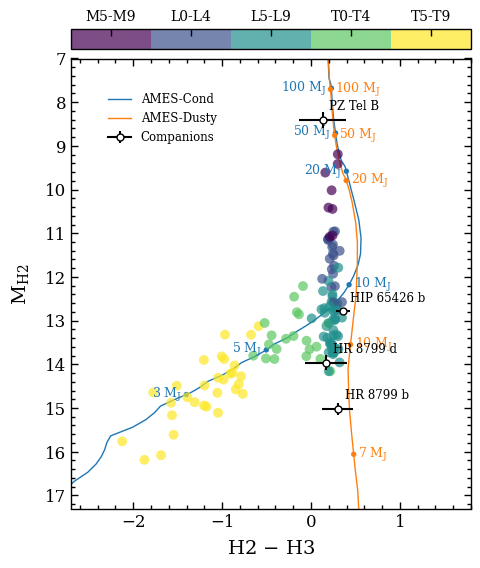

 [DONE]


In [16]:
fig = plot_color_magnitude(boxes=[colorbox, modelcolor1, modelcolor2],
                                   objects=objects,
                                   mass_labels={'ames-cond': [(3., 'left'), (5., 'left'), (10., 'right'), (20., 'left'), (50., 'left'), (100., 'left')],
                                                'ames-dusty': [(7., 'right'), (10., 'right'), (20., 'right'), (50., 'right'), (100., 'right')]},
                                   companion_labels=True,
                                   field_range=('late M', 'late T'),
                                   label_x=r'H2 $-$ H3',
                                   label_y=r'M$_\mathregular{H2}$',
                                   xlim=(-2.7, 1.8),
                                   ylim=(17.3, 7),
                                   offset=(-0.07, -0.1),
                                   legend=(0.08, 0.8),
                                   output=None)

The [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function returned the [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object of the plot. The functionalities of [Matplotlib](https://matplotlib.org/stable/index.html) can be used for further customization of the plot. For example, the axes of the plot are stored at the `axes` attribute of `Figure`.

In [17]:
fig.axes

[<Axes: xlabel='H2 $-$ H3', ylabel='M$_\\mathregular{H2}$'>, <Axes: >]